# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from wordcloud import WordCloud
from collections import Counter

## Load data

In [2]:
df = read_meta_data()
df.popularity = df.popularity.astype(float)
df.head(3)

,movieId,id,title,cast,keywords,genres,vote_average,vote_count,overview,release_date,popularity,tagline,director
index,,,,,,,,,,,,,
0,1,862,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]",7.7,5415,"Led by Woody, Andy's toys live happily in his ...",23950,21.946943,,[John Lasseter]
1,2,8844,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, new home, recluse,...","[Adventure, Fantasy, Family]",6.9,2413,When siblings Judy and Peter discover an encha...,23952,17.015539,Roll the dice and unleash the excitement!,[Joe Johnston]
2,3,15602,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Sophia Loren, Da...","[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]",6.5,92,A family wedding reignites the ancient feud be...,23952,11.712900,Still Yelling. Still Fighting. Still Ready for...,[Howard Deutch]


## 1. Genres

In [3]:
GENRES = df.genres.explode().to_frame()
GENRES

,genres
index,
0,Animation
0,Comedy
0,Family
1,Adventure
1,Fantasy
...,...
46625,Action
46625,Drama
46625,Thriller


In [4]:
GENRES.reset_index().groupby("genres").count().sort_values(by="index",ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime',
       'Documentary', 'Adventure', 'Family', 'Mystery', 'Fantasy', 'Animation',
       'Foreign', 'Music', 'History', 'War', 'Western'],
      dtype='object', name='genres')

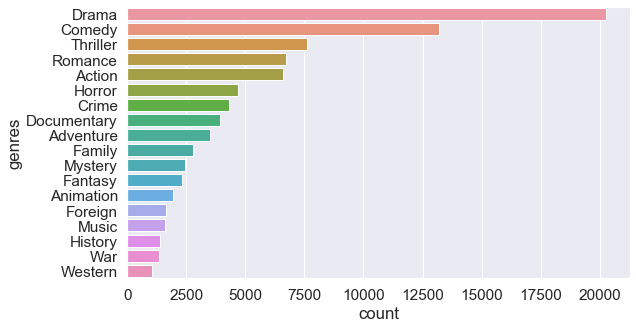

In [5]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,5))
sns.countplot(data=GENRES, y=GENRES["genres"], 
              order=GENRES.reset_index().groupby("genres").count().sort_values(by="index",ascending=False).index)
plt.show()

## 2. Director

In [6]:
DIRECTOR = df.director.explode().reset_index().groupby("director").count().sort_values(by="index", ascending=False).head(30).squeeze()
DIRECTOR

director
John Ford           68
Michael Curtiz      65
Werner Herzog       55
Alfred Hitchcock    53
Georges Méliès      51
Woody Allen         49
Sidney Lumet        46
Charlie Chaplin     44
Raoul Walsh         43
Henry Hathaway      43
Richard Thorpe      42
Martin Scorsese     41
George Cukor        40
Ingmar Bergman      39
John Huston         39
Mervyn LeRoy        38
Robert Altman       38
Fritz Lang          38
Takashi Miike       37
Claude Chabrol      37
Frank Capra         37
Robert Wise         37
Mario Monicelli     36
Buster Keaton       36
Spike Lee           36
Howard Hawks        36
Roger Corman        36
Clint Eastwood      35
Michael Apted       35
Joseph Sargent      35
Name: index, dtype: int64

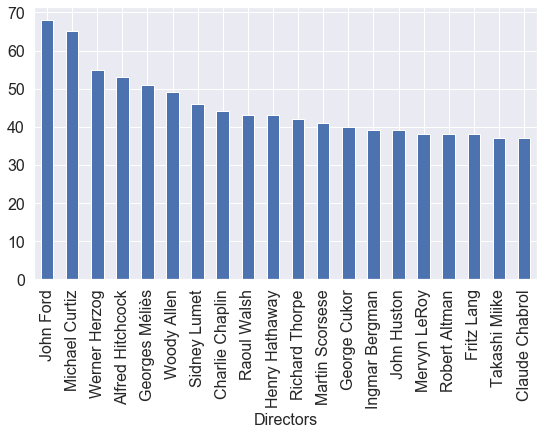

In [7]:
plt.figure(figsize=(9, 5))
DIRECTOR.head(20).plot.bar(fontsize=16)
plt.xlabel("Directors", fontsize=16)
plt.show()

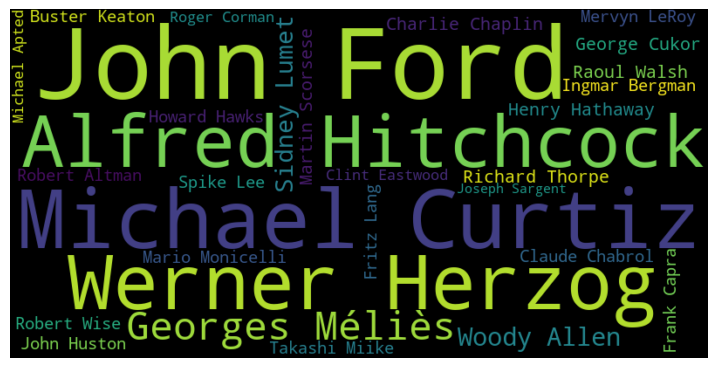

In [8]:
wordcloud = WordCloud(width=800, height=400, background_color="black", max_words=100).generate_from_frequencies(DIRECTOR)
plt.figure(figsize=(9, 5), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3. Cast

In [9]:
CAST = df.cast.explode().reset_index().groupby("cast").count().squeeze().sort_values(ascending=False)
CAST

cast
Bess Flowers        241
Christopher Lee     148
John Wayne          125
Michael Caine       110
Gérard Depardieu    110
                   ... 
Mafalda Vilhena       1
Mag Lam               1
Magali Alvarado       1
Magali Amadei         1
2 Chainz              1
Name: index, Length: 178351, dtype: int64

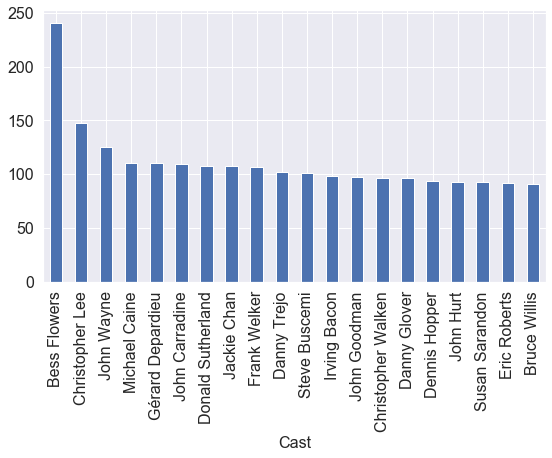

In [10]:
plt.figure(figsize=(9, 5))
CAST.head(20).plot.bar(fontsize=16)
plt.xlabel("Cast", fontsize=16)
plt.show()

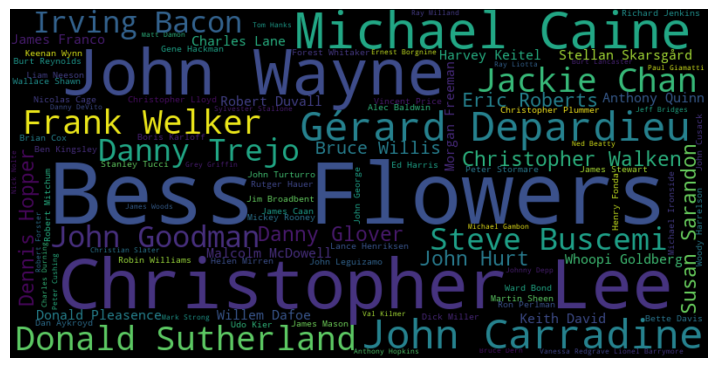

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color="black", max_words=100).generate_from_frequencies(CAST)
plt.figure(figsize=(9, 5), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 4. Keywords

In [12]:
KEYWORDS = df.keywords.explode().reset_index().groupby("keywords").count().squeeze().sort_values(ascending=False)
KEYWORDS

keywords
woman director         3037
independent film       1915
murder                 1285
based on novel          821
musical                 725
                       ... 
marine researchers        1
marine conservation       1
marine biology            1
marina                    1
leisure                   1
Name: index, Length: 19840, dtype: int64

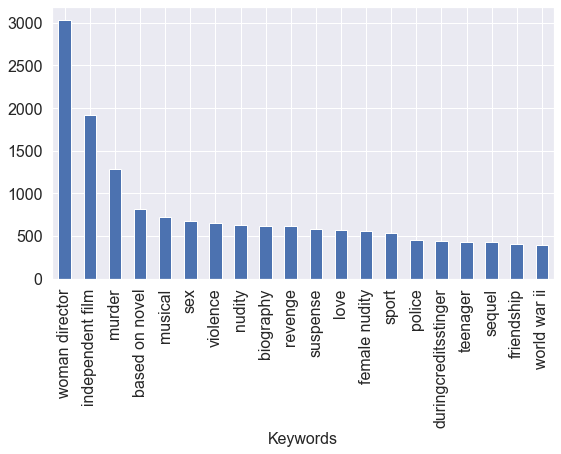

In [13]:
plt.figure(figsize=(9, 5))
KEYWORDS.head(20).plot.bar(fontsize=16)
plt.xlabel("Keywords", fontsize=16)
plt.show()

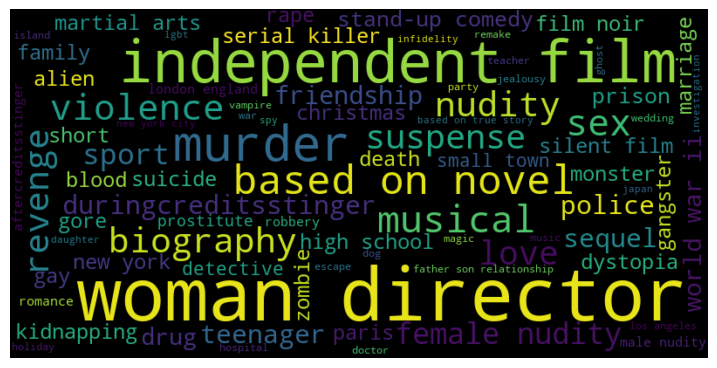

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color="black", max_words=80).generate_from_frequencies(KEYWORDS)
plt.figure(figsize=(9, 5), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Popularity

In [15]:
POPULARITY = df[["title", "popularity"]].sort_values(by="popularity", ascending=False).set_index("title")
POPULARITY.head()

,popularity
title,
Minions,547.488298
Wonder Woman,294.337037
Beauty and the Beast,287.253654
Baby Driver,228.032744
Big Hero 6,213.849907


<Figure size 648x360 with 0 Axes>

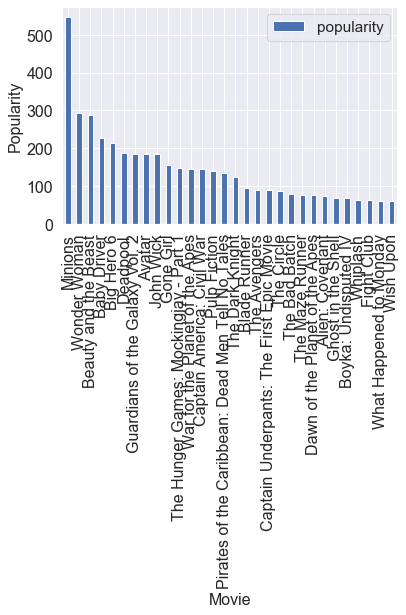

In [16]:
plt.figure(figsize=(9,5))
POPULARITY.head(30).plot.bar(fontsize=16)
plt.xlabel("Movie", fontsize=16)
plt.ylabel("Popularity", fontsize=16)

plt.show()

## 6. Unique user, rating count distribution

In [17]:
df_rating_small = pd.read_csv("../data/ratings.csv")

In [18]:
unique_user_rating_count = df_rating_small.groupby("userId")["movieId"].count()
unique_user_rating_count.shape

(270896,)

total number of unique users: 671

In [19]:
unique_user_rating_count.head()

userId
1    27
2    22
3    10
4    62
5    26
Name: movieId, dtype: int64

In [20]:
unique_user_rating_count.min()

1

In [21]:
unique_user_rating_count.max()

18276

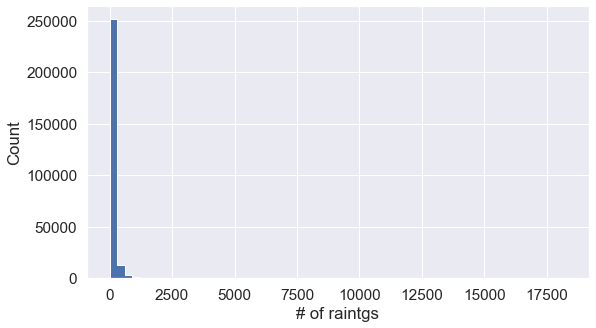

In [22]:
plt.figure(figsize=(9,5))
unique_user_rating_count.hist(bins=60, histtype="stepfilled")
plt.xlabel("# of raintgs")
plt.ylabel("Count")
plt.show()

## 7. Release date

In [23]:
meta_df = pd.read_csv("../data/movies_metadata.csv", dtype=str)
meta_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0


In [24]:
def date_process(x):
    x = str(x)
    if len(x) < 9:
        return None
    return x[:7]

In [25]:
release_date = meta_df.release_date.apply(date_process).dropna()
release_date

0        1995-10
1        1995-12
2        1995-12
3        1995-12
4        1995-02
          ...   
45460    1991-05
45462    2011-11
45463    2003-08
45464    1917-10
45465    2017-06
Name: release_date, Length: 45376, dtype: object

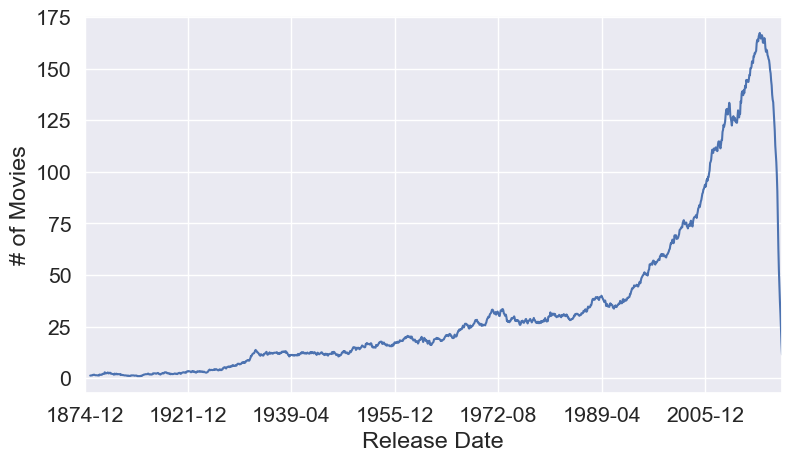

In [26]:
plt.figure(figsize=(9, 5), dpi=100)
release_date.groupby(release_date).count().rolling(12).mean().plot(color="b")
plt.xlabel("Release Date")
plt.ylabel("# of Movies")
plt.show()